# Product Analytics 2025: Домашнее задание 12


## Задание:
Веб-сервис, управления личными слотами на консультации или календарь для записи на консультации с возможностью приема денег за консультацию. Данный бизнес - это стартап, который существует всего три месяца, май, июнь и июль.

Необходимо рассчитать юнит-экономику бизнеса на основе обработки предоставленного Dataset. При этом нужно рассчитать общие значения метрик юнит-экономики для всего бизнеса,  а также для каждой когорты. Сама Dataset уже имеет разметку всех пользователей по когортам.

In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных из датасета
#df = pd.read_excel("PA_Dataset.xlsx")
df = pd.read_pickle("PA_DAtaset.pkl")
df.head(3)

##### Обработка данных после Google Sheets 
df['buyer'] = df['buyer'].replace("-", np.nan) # Заамена значений "-" на NaN для удобства
df['aov'] = df['aov'].replace(0, np.nan)
df['cogs'] = df['cogs'].replace(0, np.nan)


In [3]:
df

,data,cohort,uuid,buyer,new buyer,aov,cogs,ltc,month,n_payment
0,2024-05-01,2024-05,be239004-bc93-4732-8d2e-db1c9abc70f9,NaN,False,NaN,NaN,0,2024-5,NaN
1,2024-05-01,2024-05,ff709093-05bd-4c07-8d47-20a1e22450df,NaN,False,NaN,NaN,8,2024-5,NaN
2,2024-05-01,2024-05,024c15c8-33a9-4f4c-b471-c47a2364dc30,NaN,False,NaN,NaN,8,2024-5,NaN
3,2024-05-01,2024-05,3186905a-cf69-40fe-a615-51342cc6158b,NaN,False,NaN,NaN,8,2024-5,NaN
4,2024-05-01,2024-05,919338ce-b051-4c7a-aa3c-e7c951644a77,NaN,False,NaN,NaN,0,2024-5,NaN
...,...,...,...,...,...,...,...,...,...,...
59313,2024-07-31,2024-07,bff9f722-83d9-4907-ac23-cb76399912c5,NaN,False,NaN,NaN,8,2024-7,NaN
59314,2024-07-31,2024-07,c5e8d0e7-2128-4113-a29c-866f2abf1af0,NaN,False,NaN,NaN,0,2024-7,NaN
59315,2024-07-31,2024-07,d613f8a5-f0f9-4b7b-bc54-27c62bd03eef,NaN,False,NaN,NaN,0,2024-7,NaN
59316,2024-07-31,2024-07,6b1105f3-8759-4475-adc8-07447b6a994f,NaN,False,NaN,NaN,0,2024-7,NaN


In [4]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных из датасета
#df = pd.read_excel("PA_Dataset.xlsx")
df = pd.read_pickle("PA_DAtaset.pkl")
df.head(3)

##### Обработка данных после Google Sheets 
df['buyer'] = df['buyer'].replace("-", np.nan) # Заамена значений "-" на NaN для удобства
df['aov'] = df['aov'].replace(0, np.nan)
df['cogs'] = df['cogs'].replace(0, np.nan)

##### Расчет юние экономики по кагортам
ch0 = df.groupby('cohort').agg(
    UA=('uuid', 'nunique'),
    B=('buyer', 'nunique'),
    T=('buyer', 'count'),
    AOV=('aov', 'mean'),
    COGS=('cogs', 'mean'),
    sum_ltc=('ltc', 'sum')    
)

ch0['LTC']  = ch0['sum_ltc'] / ch0['UA']
ch0['APC']  = ch0['T'] / ch0['B']
ch0['C1']   = ch0['B'] / ch0['UA'] 
ch0['CLTV'] = ( ch0['AOV'] - ch0['COGS'] ) * ch0['APC'] 
ch0['LTV']  = ch0['CLTV'] * ch0['C1']  
ch0['AC']   = ch0['UA'] * ch0['LTC']
ch0['CM']   = ch0['UA'] * (ch0['CLTV'] * ch0['C1'] - ch0['LTC'])
ch0['Revenue'] = ch0['B'] * ch0['AOV'] * ch0['APC']

ch0 = ch0.drop('sum_ltc', axis=1)

# Расчет итогов 
total = ch0.sum()
total['AOV']  = ch0.loc['2024-05','AOV']
total['COGS'] = ch0.loc['2024-05','COGS']
total['LTC']  = total['AC'] / total['UA']
total['APC']  = total['T'] / total['B']
total['C1']   = total['B'] / total['UA'] 
total['CLTV'] = (total['Revenue'] / total['T'] - total['COGS']) * total['APC']
total['LTV']  = total['CLTV'] * total['C1']
total['CM']   = total['UA'] * (total['CLTV'] * total['C1'] - total['LTC'])

# Добавление итогов в DataFrame по когортам
total.name = 'Total'  # Название итоговой строки
ch1 = pd.concat([ch0, total.to_frame().T])
ch1.index.name = "Cohorts"

ch1['C1'] = ch1['C1'] * 100
display(ch1.style.format({
        'B': '{:,.0f}',
        'T': '{:,.0f}',
        'UA': '{:,.0f}',
        'AC': '{:,.0f}',
        'CM': '{:,.0f}',
        'C1': '{:.2f}%', 
        'AOV': '{:.2f}',
        'COGS': '{:.2f}',
        'APC': '{:.2f}',
        'CLTV': '{:.2f}',
        'LTC': '{:.2f}',
        'LTV': '{:.2f}',
        'Revenue': '{:,.0f}'
    })
)

,UA,B,T,AOV,COGS,LTC,APC,C1,CLTV,LTV,AC,CM,Revenue
Cohorts,,,,,,,,,,,,,
2024-05,"9,810",197,328,10.00,1.30,11.55,1.66,2.01%,14.49,0.29,"113,352","-110,498","3,280"
2024-06,"14,547",201,268,10.00,1.30,8.12,1.33,1.38%,11.60,0.16,"118,106","-115,774","2,680"
2024-07,"17,094",149,149,10.00,1.30,5.26,1.00,0.87%,8.70,0.08,"89,907","-88,611","1,490"
Total,"41,451",547,745,10.00,1.30,7.75,1.36,1.32%,11.85,0.16,"321,365","-314,884","7,450"



UA когорты 

month             2024-5  2024-6  2024-7  Итого по строке
cohort                                                   
2024-05             9810    6376    4218            20404
2024-06                0   14547    7273            21820
2024-07                0       0   17094            17094
Итого по колонке    9810   20923   28585            59318


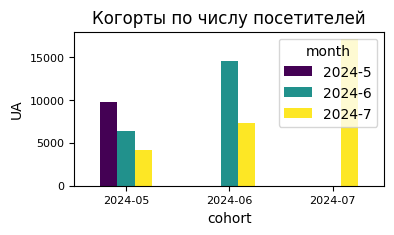

In [5]:
print('\nUA когорты \n')
ua = pd.pivot_table(df, index='cohort', columns='month', values='uuid', aggfunc='nunique')
ua.fillna(0, inplace=True)
ua = ua.astype(int)
#ua.plot(kind="bar", ylabel='UA', title="Когорты по числу посетителей", figsize=(4,2),colormap='viridis',rot=0,fontsize=8)
ua['Итого по строке'] = ua.sum(axis=1)
ua.loc['Итого по колонке'] = ua.sum(axis=0)
print(ua)

In [155]:
print('\nB когорты \n')
b = pd.pivot_table(df, index='cohort', columns='month', values='new buyer', aggfunc='sum')
b.fillna(0, inplace=True)
b = b.astype(int)
b['Итого по строке'] = b.sum(axis=1)
b.loc['Итого по колонке'] = b.sum(axis=0)
print(b)


B когорты 

month             2024-5  2024-6  2024-7  Итого по строке
cohort                                                   
2024-05               88      65      44              197
2024-06                0     134      67              201
2024-07                0       0     149              149
Итого по колонке      88     199     260              547


In [165]:
print('\nT когорты \n')
t = pd.pivot_table(df, index='cohort', columns='month', values='buyer', aggfunc='count')
t.fillna(0, inplace=True)
t = t.astype(int)
t['Итого по строке'] = t.sum(axis=1)
t.loc['Итого по колонке'] = t.sum(axis=0)
print(t)


T когорты 

month             2024-5  2024-6  2024-7  Итого по строке
cohort                                                   
2024-05               88     124     116              328
2024-06                0     134     134              268
2024-07                0       0     149              149
Итого по колонке      88     258     399              745


In [163]:
print('\nRevenue когорты \n')
revenue = pd.pivot_table(df, index='cohort', columns='month', values='aov', aggfunc='sum')
revenue.fillna(0, inplace=True)
revenue = revenue.astype(int)
revenue['Итого по строке'] = revenue.sum(axis=1)
revenue.loc['Итого по колонке'] = revenue.sum(axis=0)
print(revenue)


Revenue когорты 

month             2024-5  2024-6  2024-7  Итого по строке
cohort                                                   
2024-05              880    1240    1160             3280
2024-06                0    1340    1340             2680
2024-07                0       0    1490             1490
Итого по колонке     880    2580    3990             7450


In [158]:
print('\nAOV когорты \n')
aov = pd.pivot_table(df, index='cohort', columns='month', values='aov', aggfunc='mean')
aov.fillna(0, inplace=True)
aov = aov.astype(int)
print(aov.astype(int))


AOV когорты 

month    2024-5  2024-6  2024-7
cohort                         
2024-05      10      10      10
2024-06       0      10      10
2024-07       0       0      10


In [11]:
print('\nAPC когорты \n')
# Добавление рассчитанных значений APC в основной DataFrame df
# Объединение DataFrame df и ch0 с явным указанием суффиксов
df = df.merge(
    ch0[['APC']].reset_index(),  # Взять APC из ch0 и сбросить индекс
    how='left',                  # Объединение по общим ключам
    on='cohort',                 # Соединение по когортам
    suffixes=('', '_from_ch0')   # Указание суффикса для избежания конфликта
)
# Построение сводной таблицы
apc = df.pivot_table(values='APC', index='cohort', columns='month', aggfunc='mean')
apc.fillna(0, inplace=True)
apc = apc.astype(float).round(2)
print(apc)


APC когорты 

month    2024-5  2024-6  2024-7
cohort                         
2024-05    1.66    1.66    1.66
2024-06    0.00    1.33    1.33
2024-07    0.00    0.00    1.00


In [8]:
print('\nC1 когорты \n')
# Добавление рассчитанных значений C1 в основной DataFrame df
# Объединение DataFrame df и ch0 с явным указанием суффиксов
df = df.merge(
    ch0[['C1']].reset_index(),   # Взять C1 из ch0 и сбросить индекс
    how='left',                  # Объединение по общим ключам
    on='cohort',                 # Соединение по когортам
    suffixes=('', '_from_ch0')   # Указание суффикса для избежания конфликта
)
# Построение сводной таблицы
c1 = df.pivot_table(values='C1', index='cohort', columns='month', aggfunc='mean')
c1.fillna(0, inplace=True)
c1_percent = c1 * 100
for col in c1_percent.columns:
    c1_percent[col] = c1_percent[col].apply(lambda x: f"{x:.2f}%")

print(c1_percent)


C1 когорты 

month   2024-5 2024-6 2024-7
cohort                      
2024-05  2.01%  2.01%  2.01%
2024-06  0.00%  1.38%  1.38%
2024-07  0.00%  0.00%  0.87%


In [9]:
df

,data,cohort,uuid,buyer,new buyer,aov,cogs,ltc,month,n_payment,APC,C1
0,2024-05-01,2024-05,be239004-bc93-4732-8d2e-db1c9abc70f9,NaN,False,NaN,NaN,0,2024-5,NaN,1.664975,0.020082
1,2024-05-01,2024-05,ff709093-05bd-4c07-8d47-20a1e22450df,NaN,False,NaN,NaN,8,2024-5,NaN,1.664975,0.020082
2,2024-05-01,2024-05,024c15c8-33a9-4f4c-b471-c47a2364dc30,NaN,False,NaN,NaN,8,2024-5,NaN,1.664975,0.020082
3,2024-05-01,2024-05,3186905a-cf69-40fe-a615-51342cc6158b,NaN,False,NaN,NaN,8,2024-5,NaN,1.664975,0.020082
4,2024-05-01,2024-05,919338ce-b051-4c7a-aa3c-e7c951644a77,NaN,False,NaN,NaN,0,2024-5,NaN,1.664975,0.020082
...,...,...,...,...,...,...,...,...,...,...,...,...
59313,2024-07-31,2024-07,bff9f722-83d9-4907-ac23-cb76399912c5,NaN,False,NaN,NaN,8,2024-7,NaN,1.000000,0.008717
59314,2024-07-31,2024-07,c5e8d0e7-2128-4113-a29c-866f2abf1af0,NaN,False,NaN,NaN,0,2024-7,NaN,1.000000,0.008717
59315,2024-07-31,2024-07,d613f8a5-f0f9-4b7b-bc54-27c62bd03eef,NaN,False,NaN,NaN,0,2024-7,NaN,1.000000,0.008717
59316,2024-07-31,2024-07,6b1105f3-8759-4475-adc8-07447b6a994f,NaN,False,NaN,NaN,0,2024-7,NaN,1.000000,0.008717
